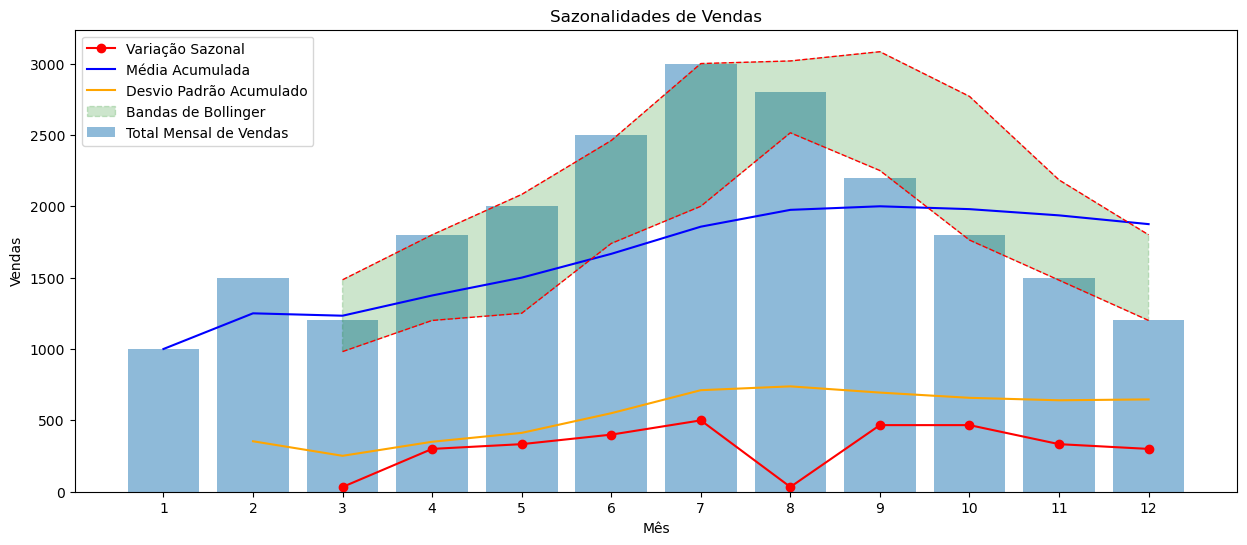

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss

# Dados de exemplo
data = {
    'Data': ['2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01', '2023-07-01', '2023-08-01', '2023-09-01', '2023-10-01', '2023-11-01', '2023-12-01'],
    'Vendas': [1000, 1500, 1200, 1800, 2000, 2500, 3000, 2800, 2200, 1800, 1500, 1200]
}

# Criar DataFrame
df = pd.DataFrame(data)
df['Data'] = pd.to_datetime(df['Data'])
df = df.set_index('Data')

# Calcular a média móvel dos dados
window = 3  # Número de períodos para calcular a média móvel
df['Tendencia'] = df['Vendas'].rolling(window).mean()

# Calcular a média acumulada dos dados
df['MediaAcumulada'] = df['Vendas'].expanding().mean()

# Calcular o desvio padrão acumulado dos dados
df['DesvioPadraoAcumulado'] = df['Vendas'].expanding().std()

# Bandas de Bollinger
num_std = 1
df['DesvioPadraoMovel'] = df['Vendas'].rolling(window).std()
df['LimiteSuperior'] = df['Tendencia'] + (df['DesvioPadraoMovel'] * num_std)
df['LimiteInferior'] = df['Tendencia'] - (df['DesvioPadraoMovel'] * num_std)

# Plotar o gráfico
plt.figure(figsize=(15, 6))
ax = plt.gca()

# Plotar as médias mensais de vendas
ax.bar(df.index.month, df['Vendas'], align='center', alpha=0.5, label='Total Mensal de Vendas')

# Plotar a variação sazonal
ax.plot(df.index.month, abs(df['Vendas'] - df['Tendencia']), marker='o', color='red', label='Variação Sazonal')

# Plotar a média acumulada
ax.plot(df.index.month, df['MediaAcumulada'], linestyle='-', color='blue', label='Média Acumulada')

# Plotar o desvio padrão acumulado
ax.plot(df.index.month, df['DesvioPadraoAcumulado'], linestyle='-', color='orange', label='Desvio Padrão Acumulado')

# Bandas de bollinger
ax.fill_between(df.index.month, df['LimiteSuperior'], df['LimiteInferior'], 
                alpha=0.2, color = 'green', linestyle = '--', label='Bandas de Bollinger'
)

# Customize the style and color of the upper and lower bands
ax.plot(df.index.month, df['LimiteSuperior'], linestyle='--', linewidth=1, color='red')
ax.plot(df.index.month, df['LimiteInferior'], linestyle='--', linewidth=1, color='red')

plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.title('Sazonalidades de Vendas')
plt.xticks(range(1, 13))
plt.legend()
plt.show()


In [31]:
pvalue_adf = adfuller(x=df['Vendas'], regression='ct')[1]

print(f"AdFuller test: {pvalue_adf.round(2)}")

pvalue_kpss = kpss(x=df['Vendas'], regression='ct')[1]

print(f"KPSS test: {pvalue_kpss.round(2)}")

AdFuller test: 0.98
KPSS test: 0.03


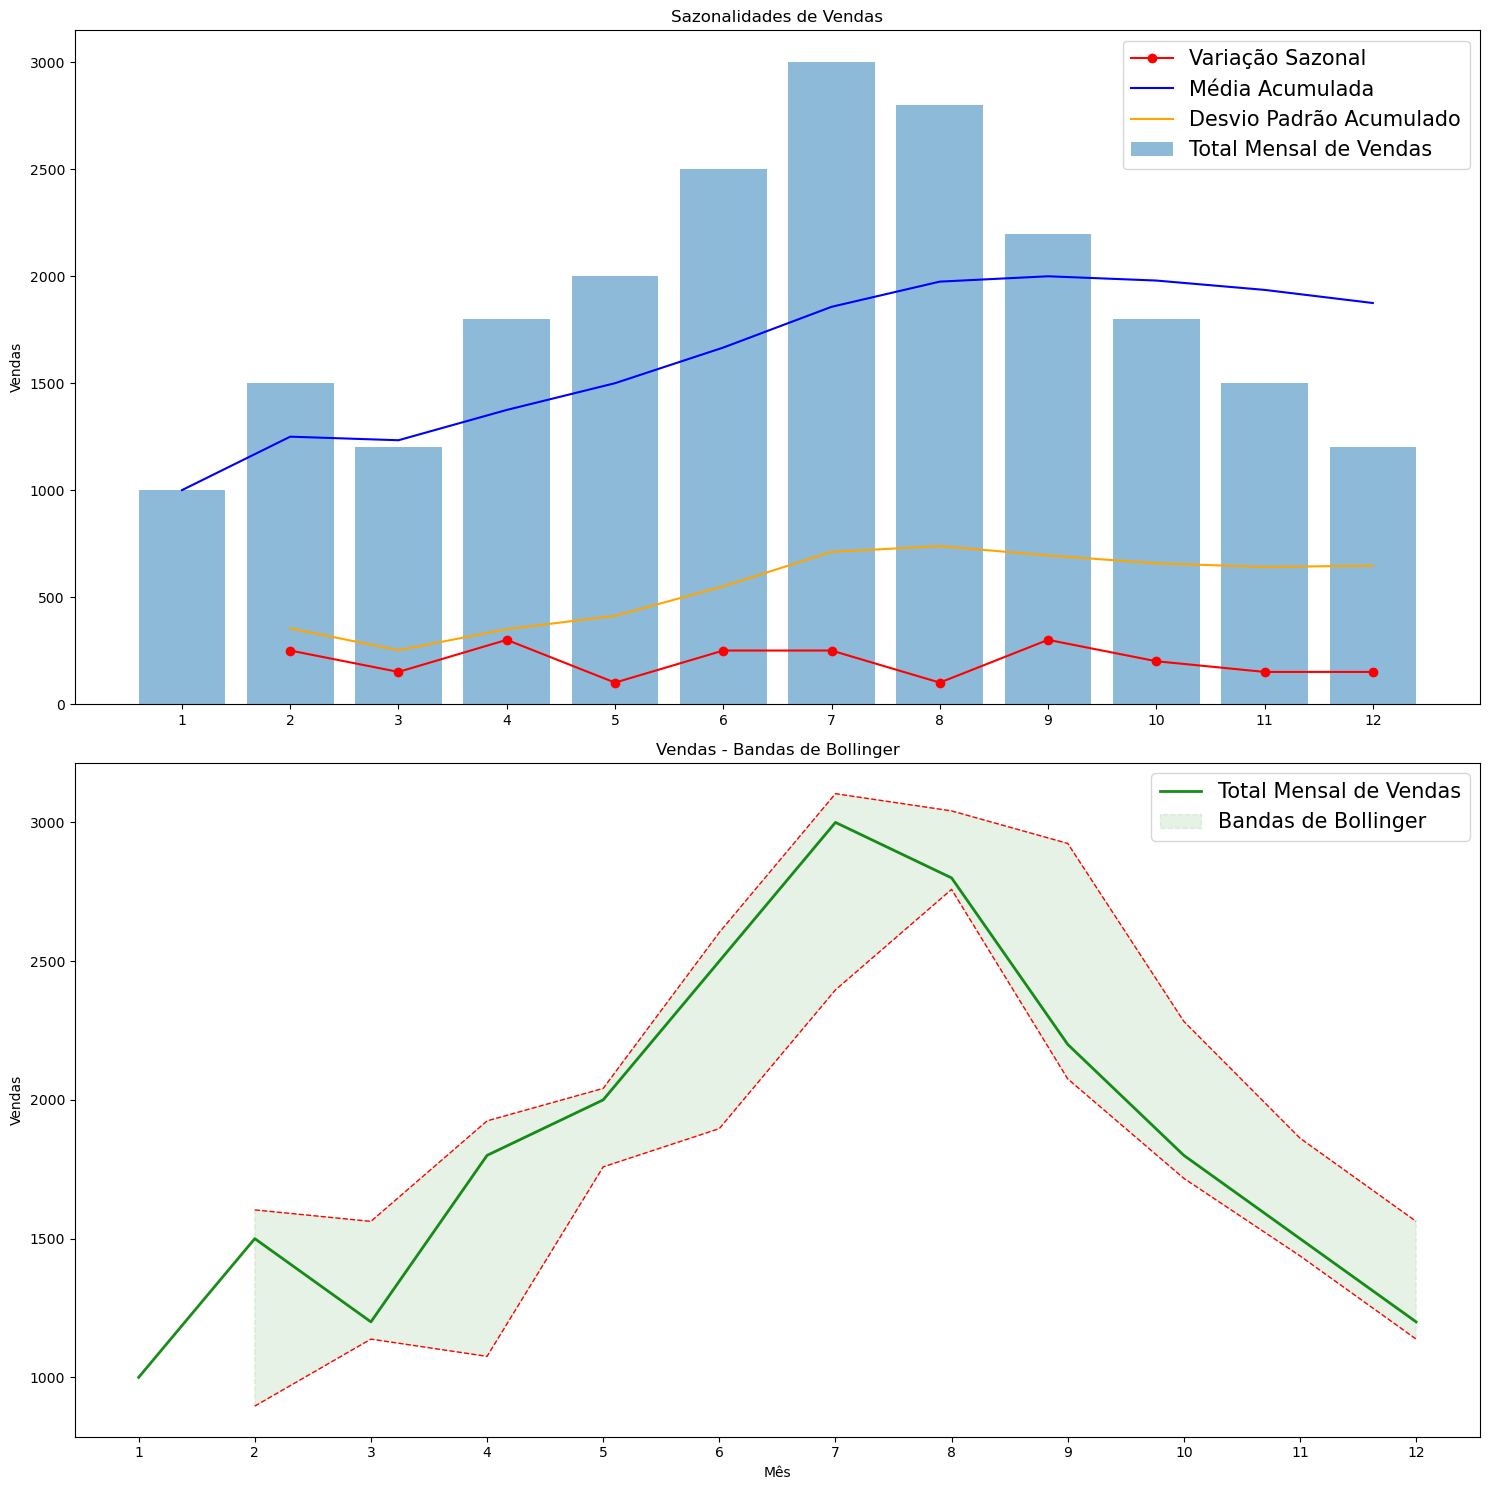

In [48]:
# Plotar o gráfico
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 15))

# Plotar as médias mensais de vendas
ax1.bar(df.index.month, df['Vendas'], align='center', alpha=0.5, label='Total Mensal de Vendas')

# Plotar a variação sazonal
ax1.plot(df.index.month, abs(df['Vendas'] - df['Tendencia']), marker='o', color='red', label='Variação Sazonal')

# Plotar a média acumulada
ax1.plot(df.index.month, df['MediaAcumulada'], linestyle='-', color='blue', label='Média Acumulada')

# Plotar o desvio padrão acumulado
ax1.plot(df.index.month, df['DesvioPadraoAcumulado'], linestyle='-', color='orange', label='Desvio Padrão Acumulado')

####--------------------------------------
ax2.plot(df.index.month, df['Vendas'], alpha=0.9, color = 'green', linewidth = 2, label='Total Mensal de Vendas')

# Bandas de bollinger
ax2.fill_between(df.index.month, df['LimiteSuperior'], df['LimiteInferior'], 
                alpha=0.1, color = 'green', linestyle = '--', label='Bandas de Bollinger'
)

# Customize the style and color of the upper and lower bands
ax2.plot(df.index.month, df['LimiteSuperior'], linestyle='--', linewidth=1, color='red')
ax2.plot(df.index.month, df['LimiteInferior'], linestyle='--', linewidth=1, color='red')

ax2.set_xlabel('Mês')
ax1.set_ylabel('Vendas')
ax2.set_ylabel('Vendas')
ax1.set_title('Sazonalidades de Vendas')
ax2.set_title('Vendas - Bandas de Bollinger')
ax1.set_xticks(range(1, 13))
ax2.set_xticks(range(1, 13))
ax1.legend(fontsize = 15)
ax2.legend(fontsize = 15)

plt.tight_layout()
plt.show()